<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/%08Keara(Iris%20Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
data = load_iris()

In [ ]:
feature = data['data']
# 1차원 배열의 target값을 2차원 배열로 만들어주고, 
# classification을 위해 값을 [0, 1]로 만들어 주기 위해 to_categorical 사용
target = to_categorical(data['target'])

In [ ]:
from sklearn.preprocessing import StandardScaler
# 표준화하기 전에 86% 너무 낮게 나와 표준화 진행 -> 성능향상
scaler = StandardScaler()
feature_data = scaler.fit_transform(feature)

In [ ]:
# 학습 데이터 생성
x_train, x_test, y_train, y_test = train_test_split(feature_data, target, test_size=0.2)

In [ ]:
x_train.shape
# y_train.shape
# x_test.shape
# y_test.shape

(120, 4)

In [ ]:
x_input = Input(batch_shape = (None, 4))  # None : 임의의 수의 4차원 벡터로 이루어진 배치
# relu : x가 0보다 크면 기울기가 1인 직선, 0보다 작으면 함수 값이 0이 된다. 이는 0보다 작은 값들에서 뉴런이 죽을 수 있는 단점을 야기한다.
# 또한 sigmoid, tanh 함수보다 학습이 빠르고, 연산 비용이 적고, 구현이 매우 간단하다는 특징이 있다.
h_layer = Dense(5, activation='relu')(x_input) # Gradient Vanishing Problem를 줄일 수 있기 때문에 relu함수 사용
y_output = Dense(3, activation='softmax')(h_layer)
model = Model(x_input, y_output)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_30 (Dense)            (None, 5)                 25        
                                                                 
 dense_31 (Dense)            (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train, epochs=500, validation_data = (x_test, y_test))

Epoch 1/500
4/4 [==============================] - 0s 42ms/step - loss: 0.6397 - val_loss: 0.5805
Epoch 2/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6344 - val_loss: 0.5756
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6289 - val_loss: 0.5708
Epoch 4/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6236 - val_loss: 0.5660
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6184 - val_loss: 0.5612
Epoch 6/500
4/4 [==============================] - 0s 9ms/step - loss: 0.6132 - val_loss: 0.5563
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6079 - val_loss: 0.5515
Epoch 8/500
4/4 [==============================] - 0s 8ms/step - loss: 0.6027 - val_loss: 0.5467
Epoch 9/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5976 - val_loss: 0.5418
Epoch 10/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5926 - val_loss: 0.5369
Epoch 11/500
4/4 [========

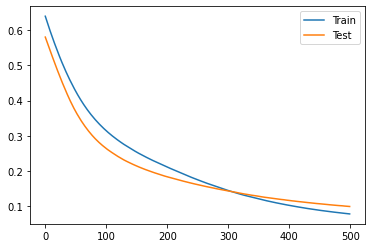

In [ ]:
plt.plot(hist.history['loss'], label='Train')
plt.plot(hist.history['val_loss'], label='Test')
plt.legend()
plt.show()

In [ ]:
y_pred_cat = model.predict(x_test)
y_pred = np.argmax(y_pred_cat, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
acc = (y_pred == y_test).mean()
print("정확도: %0.3f" % acc)

정확도: 0.967
